Author of code: William Godel, Zeve Sanderson 

Date: 07/02

Purpose: to examine and explore data

## Data IN: 

crowd_size_binary.p

crowd_size_binary_test.p

partisan_crowd_size_binary.p

crowd_size_binary_test_high_pol.p

crowd_size_binary_test_high_crt.p

## Data OUT:

no data out, just statistics and graphs


Machine: My laptop or Imac


In [1]:
#importing necessary libaries
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import quick_graph, see_data
import pickle
import os

from path import *

In [2]:
crowd_size_binary = pickle.load(open(heuristic_data + "crowd_size_binary.p", "rb" ))
crowd_size_binary_test = pickle.load(open(heuristic_data + "crowd_size_binary_test.p", "rb" ))


partisan_crowd_size_binary = pickle.load( open( heuristic_data + 'partisan_crowd_size_binary.p', "rb" ) )
partisan_crowd_size_binary_test = pickle.load( open( heuristic_data + 'partisan_crowd_size_binary_test.p', "rb" ) )


crowd_pk = pickle.load(open(heuristic_data + 'crowd_size_binary_high_pol.p', "rb"))
crowd_pk_test = pickle.load(open(heuristic_data + 'crowd_size_binary_high_pol_test.p', "rb"))

bayes_test = pickle.load(open(heuristic_data + 'bayes_crowds_types_test.p', "rb"))


In [3]:
def conf_perc(a_list):
    
    total_pos = a_list[0] + a_list[2]
    total_neg = a_list[1] + a_list[3]
    print("TP", "TN", "FP", "FN")
    return sum(a_list[0:2])/a_list[-2], a_list[0]/total_pos, a_list[2]/total_pos, a_list[1]/total_neg, a_list[3]/total_neg


## Explaining Terminology

## crowd_size_binary dictionary

The following is only for articles from fake sources.

All key for crowd_size_all have the fact checker designation, followed by "_" followed by the type of mode from the crowd.

For fact checker designations, the designation is binary. For example, the set allfalse, is those articles that are true according to all three of our possible designations (mode, robust mode, and no one said true). Crowds are correct when they labels articles in allfalse as false, or when they label articles not in that set as anything other than false.

Fact Checker designations:

fcmodefalse = If false or not determined by mode

rmfalse = If false or not determined by robust mode

allfalse = If false or not if in all three false designations

anyfalse = If false or not if in any of the three false designations

notrue = If false or not depending on if no one labelled it true

The above three have a "true" set counterpart.

Crowd Signal:

origmode = original mode

nocnd = ignore CND, pure majority of "f" or "t" wins

modefm = CND is treated as FM, and then pure majority.

So, for example, anyfalse_modefm is when the articles are binary in or not in the anyfalse set, and crowd signal is only "f" or "t", with all cnd votes by individual respondents treated as "f"

run this as:

`quick_graph(crowd_size_binary,'allfalse_modefm')`

If you want a title, do title = "My title"

If doing multiple graphs at once, the title will be the last one in the cell.


You can also add the baseline argument (adding baseline = True)

This shows the level of performance just by picking the majority label. It's a lower bound of what decent performance should be.


## general - 25

In [28]:
conf_perc(crowd_size_binary['fcmodefalse_origmode'][0])

TP TN FP FN


(0.5741925925925926,
 0.4902279248551784,
 0.5097720751448216,
 0.6058251239062595,
 0.3941748760937404)

In [4]:
conf_perc(crowd_size_binary['fcmodefalse_origmode'][-1])

TP TN FP FN


(0.615037037037037,
 0.572021161476494,
 0.42797883852350604,
 0.6291039201038021,
 0.37089607989619783)

In [5]:
conf_perc(crowd_size_binary_test['fcmodefalse_origmode'][-1])

TP TN FP FN


(0.5521428571428572,
 0.5283419217944831,
 0.4716580782055168,
 0.5594804223904308,
 0.4405195776095692)

## ideological balanced 15

In [27]:
conf_perc(partisan_crowd_size_binary['fcmodefalse_origmode'][0])

TP TN FP FN


(0.5912857860371673,
 0.5307650315838728,
 0.4692349684161273,
 0.6065357935899703,
 0.39346420641002966)

In [6]:
conf_perc(partisan_crowd_size_binary['fcmodefalse_origmode'][-1])

TP TN FP FN


(0.6100420642893019,
 0.5643737832576249,
 0.43562621674237506,
 0.6246118173160532,
 0.37538818268394686)

In [7]:
conf_perc(partisan_crowd_size_binary_test['fcmodefalse_origmode'][-1])

TP TN FP FN


(0.5551246958637469,
 0.5431299011251278,
 0.4568700988748721,
 0.5585673744984833,
 0.4414326255015168)

## General, cnd as fm

In [29]:
conf_perc(crowd_size_binary['fcmodefalse_modefm'][0])

TP TN FP FN


(0.5322814814814815,
 0.46052761829340727,
 0.5394723817065927,
 0.6393031153107929,
 0.36069688468920713)

In [8]:
conf_perc(crowd_size_binary['fcmodefalse_modefm'][-1])

TP TN FP FN


(0.5764, 0.49781443298969075, 0.5021855670103093, 0.777, 0.223)

In [9]:
conf_perc(crowd_size_binary_test['fcmodefalse_modefm'][-1])

TP TN FP FN


(0.6261428571428571,
 0.5612541320244415,
 0.4387458679755584,
 0.7874035349763505,
 0.21259646502364948)

## general, drop CND

In [30]:
conf_perc(crowd_size_binary['fcmodefalse_nocnd'][0])

TP TN FP FN


(0.5741925925925926,
 0.4902279248551784,
 0.5097720751448216,
 0.6058251239062595,
 0.3941748760937404)

In [10]:
conf_perc(crowd_size_binary['fcmodefalse_nocnd'][-1])

TP TN FP FN


(0.6289037037037037,
 0.5687634142314677,
 0.4312365857685323,
 0.6625762617859123,
 0.3374237382140876)

In [11]:
conf_perc(crowd_size_binary_test['fcmodefalse_nocnd'][-1])

TP TN FP FN


(0.5922142857142857,
 0.5743834526650756,
 0.42561654733492443,
 0.6022068658047258,
 0.3977931341952742)

## high pk 10

In [12]:
conf_perc(crowd_pk['fcmodefalse_origmode'][-1])

TP TN FP FN


(0.6406962962962963,
 0.604910033546813,
 0.39508996645318695,
 0.655417555304646,
 0.344582444695354)

In [13]:
conf_perc(crowd_pk_test['fcmodefalse_origmode'][-2])

TP TN FP FN


(0.6028571428571429,
 0.6194407456724368,
 0.38055925432756327,
 0.596778916544656,
 0.4032210834553441)

## Bayes 

In [14]:
conf_perc(bayes_test['fcmodefalse_bayes'][0])

TP TN FP FN


(0.5970714285714286, 0.568, 0.432, 0.618875, 0.381125)

In [15]:
conf_perc(bayes_test['fcmodefalse_bayes'][-1])

TP TN FP FN


(0.5814285714285714,
 0.5686680469289165,
 0.4313319530710835,
 0.5871749715114473,
 0.4128250284885528)

### Graphs in paper

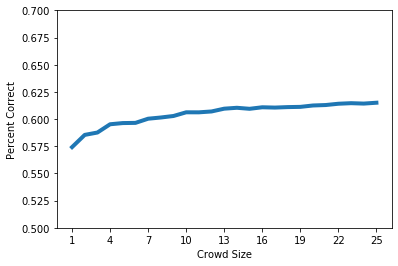

In [6]:
quick_graph(crowd_size_binary,'fcmodefalse_origmode')
plt.ylim([.5, .7])
plt.savefig(figures + 'fcmodefalse_origmode_random.pdf', dpi = 300, bbox_inches = 'tight')

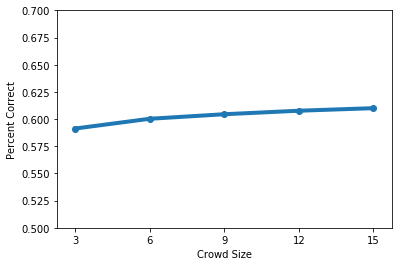

In [8]:
quick_graph(partisan_crowd_size_binary,'fcmodefalse_origmode', partisan = True)
plt.ylim([.5, .7])
plt.savefig(figures + 'fcmodefalse_origmode_partisan.pdf', dpi = 300, bbox_inches = 'tight')

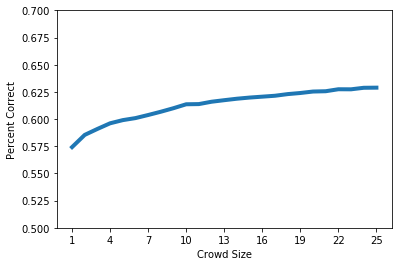

In [10]:
quick_graph(crowd_size_binary,'fcmodefalse_nocnd')
plt.ylim([.5, .7])
plt.savefig(figures + 'fcmodefalse_nocnd.pdf', dpi = 300, bbox_inches = 'tight')

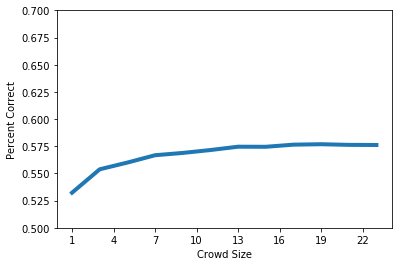

In [11]:
quick_graph(crowd_size_binary,'fcmodefalse_modefm', evens = True)
plt.ylim([.5, .7])
plt.savefig(figures + 'fcmodefalse_modefm.pdf', dpi = 300, bbox_inches = 'tight')

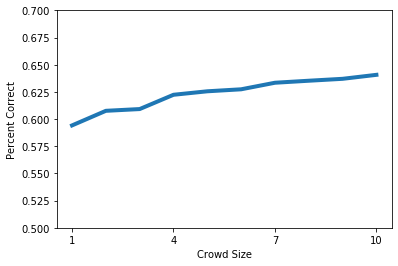

In [12]:
quick_graph(crowd_pk,'fcmodefalse_origmode')
plt.ylim([.5, .7])
plt.savefig(figures + 'fcmodefalse_origmode_highpk.pdf', dpi = 300, bbox_inches = 'tight')

## alternative graphs

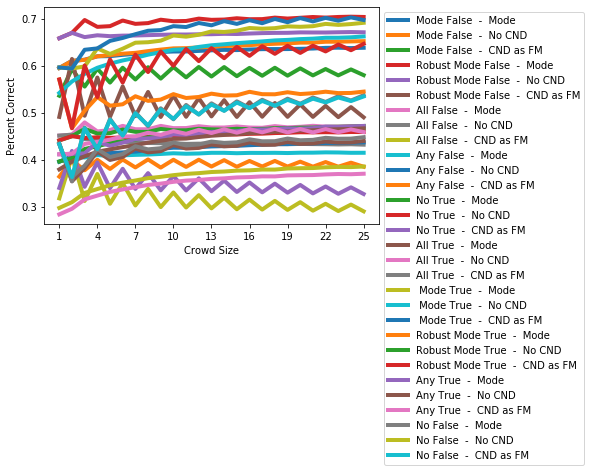

In [26]:
for key_it in crowd_size_binary.keys():
    #print(key_it)
    quick_graph(crowd_size_binary,key_it)

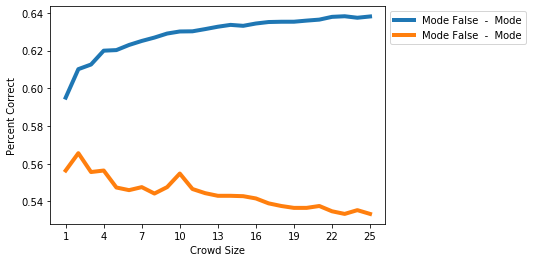

In [27]:
quick_graph(crowd_size_binary,'fcmodefalse_origmode')
quick_graph(crowd_size_binary_test,'fcmodefalse_origmode')

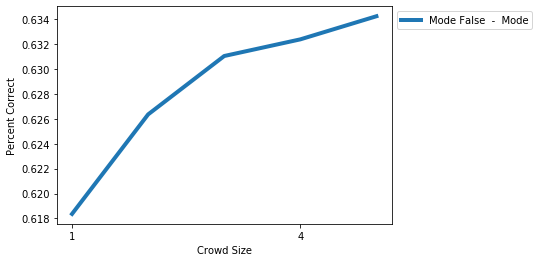

In [28]:
quick_graph(partisan_crowd_size_binary,'fcmodefalse_origmode')

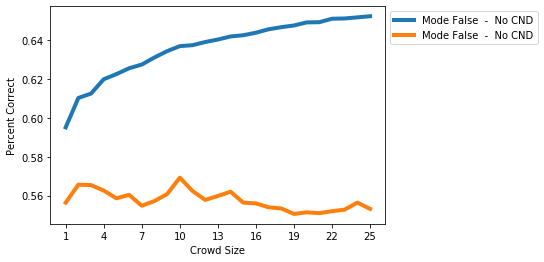

In [29]:
quick_graph(crowd_size_binary,'fcmodefalse_nocnd')
quick_graph(crowd_size_binary_test,'fcmodefalse_nocnd')

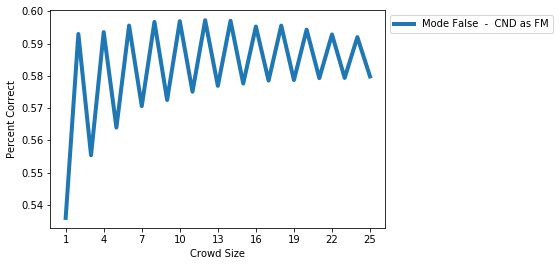

In [30]:
quick_graph(crowd_size_binary,'fcmodefalse_modefm')

## Partisan database

Now, we have parisan crowds. They are all in multiples of 3 (1 con, 1 lib, 1 mod), all the way up crowds of 15 (five of each).

Just call (notice it is a different dictionary):

`quick_graph(partisan_crowd_size_binary,'allfalse_modefm', partisan = True)`



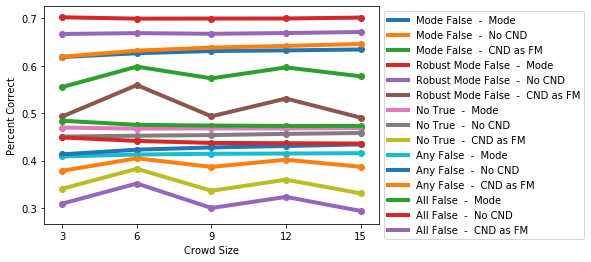

In [31]:
quick_graph(partisan_crowd_size_binary,'fcmodefalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'fcmodefalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'fcmodefalse_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'rmfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'rmfalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'rmfalse_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'notrue_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'notrue_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'notrue_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'anyfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'anyfalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'anyfalse_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'allfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'allfalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'allfalse_modefm', partisan = True)

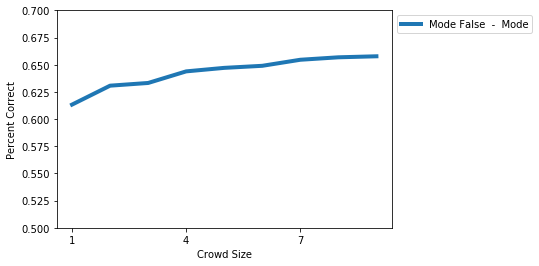

In [78]:
quick_graph(crowd_pk,'fcmodefalse_origmode', standard_y = [.50,.70])


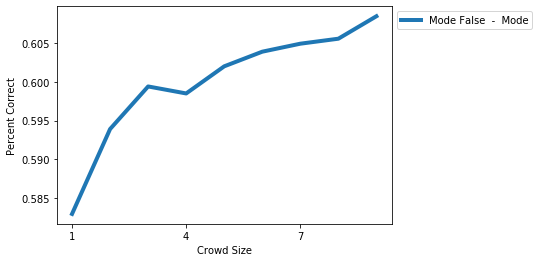

In [33]:
quick_graph(crowd_crt,'fcmodefalse_origmode')

In [34]:
see_data(crowd_pk,'fcmodefalse_origmode', crowdsize = 10)


IndexError: single positional indexer is out-of-bounds

### Confusion Matrixes

You can see all the data for a given simulation using:

`see_data(crowd_size_binary,'allfalse_modefm')`

If, you want to see it just for one crowd size, do crowdsize = 15 (if you want 15 for example.

Notice for the full data the index starts at 0 (so actual crowd size is index + 1)

You can also graph these by using:

`quick_graph(crowd_size_binary,'allfalse_modefm', column = "true_pos")`

Choices for column are:

- true_pos
- true_neg
- false_pos
- false_neg
- percentage: total percentage correct (true_pos + true_neg)

In [35]:
see_data(crowd_size_binary,"alltrue_modefm", crowdsize = 25)
see_data(crowd_size_binary,"nofalse_modefm", crowdsize = 25)
see_data(crowd_size_binary,"nofalse_nocnd", crowdsize = 25)
see_data(crowd_size_binary,"alltrue_nocnd", crowdsize = 25)

see_data(crowd_size_binary,"allfalse_origmode", crowdsize = 25)
see_data(crowd_size_binary,"notrue_origmode", crowdsize = 25)
see_data(crowd_size_binary,"notrue_modefm", crowdsize = 25)
see_data(crowd_size_binary,"allfalse_modefm", crowdsize = 25)



true_pos       5057.00000
true_neg      31202.00000
false_pos     16344.00000
false_neg     14897.00000
percentage        0.53717
total         67500.00000
Name: 24, dtype: float64

true_pos       5709.000000
true_neg      30368.000000
false_pos     15692.000000
false_neg     15731.000000
percentage        0.534474
total         67500.000000
Name: 24, dtype: float64

true_pos       8823.000000
true_neg      17198.000000
false_pos     35684.000000
false_neg      5795.000000
percentage        0.385496
total         67500.000000
Name: 24, dtype: float64

true_pos       7561.000000
true_neg      17422.000000
false_pos     36946.000000
false_neg      5571.000000
percentage        0.370119
total         67500.000000
Name: 24, dtype: float64

true_pos       3494.0000
true_neg      28285.0000
false_pos     12017.0000
false_neg     23704.0000
percentage        0.4708
total         67500.0000
Name: 24, dtype: float64

true_pos       4555.000000
true_neg      26849.000000
false_pos     10956.000000
false_neg     25140.000000
percentage        0.465244
total         67500.000000
Name: 24, dtype: float64

true_pos      11121.000000
true_neg      10952.000000
false_pos     34978.000000
false_neg     10449.000000
percentage        0.327007
total         67500.000000
Name: 24, dtype: float64

true_pos       8629.000000
true_neg      10957.000000
false_pos     37470.000000
false_neg     10444.000000
percentage        0.290163
total         67500.000000
Name: 24, dtype: float64

In [36]:
see_data(crowd_size_binary,"rmfalse_nocnd")

,true_pos,true_neg,false_pos,false_neg,percentage,total
0,4800,39638,12949,10113,0.658341,67500
1,5257,39952,12635,9656,0.669763,67500
2,5821,38777,13810,9092,0.660711,67500
3,6132,38728,13859,8781,0.664593,67500
4,6388,38344,14243,8525,0.662696,67500
5,6553,38258,14329,8360,0.663867,67500
6,6695,38132,14455,8218,0.664104,67500
7,6845,38036,14551,8068,0.664904,67500
8,6973,37957,14630,7940,0.665630,67500
9,7124,37848,14739,7789,0.666252,67500


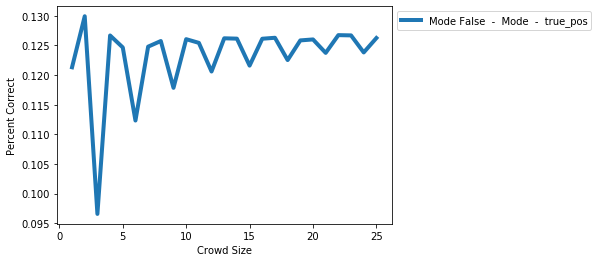

In [37]:
quick_graph(crowd_size_binary,"fcmodefalse_origmode", column = "true_pos")

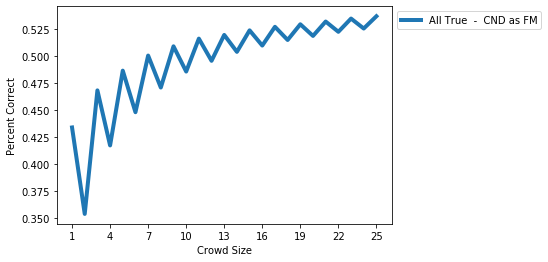

In [38]:
quick_graph(crowd_size_binary,"alltrue_modefm")

## Ranked in order of best performance with 25 respondents:

In [39]:
all_num_list = []
for key_it in crowd_size_binary.keys():
    all_num_list.append([key_it, (crowd_size_binary[key_it][-1][0] + crowd_size_binary[key_it][-1][1])/crowd_size_binary[key_it][-1][-2]])
    
final_performance = pd.DataFrame(all_num_list, columns = ['key','percentage_correct'])
    

In [40]:
final_performance.sort_values("percentage_correct", ascending = False)

,key,percentage_correct
3,rmfalse_origmode,0.703556
20,fcmodetrue_modefm,0.697081
18,fcmodetrue_origmode,0.691156
4,rmfalse_nocnd,0.670963
19,fcmodetrue_nocnd,0.662089
1,fcmodefalse_nocnd,0.652104
23,rmtrue_modefm,0.646370
0,fcmodefalse_origmode,0.638059
2,fcmodefalse_modefm,0.579807
21,rmtrue_origmode,0.544800


In [41]:
crowd_size_binary['rmfalse_origmode']

[(4800, 39638, 12949, 10113, 67500, 52587),
 (5257, 39952, 12635, 9656, 67500, 52587),
 (3846, 43207, 9380, 11067, 67500, 52587),
 (5138, 40932, 11655, 9775, 67500, 52587),
 (5042, 41129, 11458, 9871, 67500, 52587),
 (4522, 42457, 10130, 10391, 67500, 52587),
 (5052, 41448, 11139, 9861, 67500, 52587),
 (5110, 41499, 11088, 9803, 67500, 52587),
 (4749, 42348, 10239, 10164, 67500, 52587),
 (5155, 41720, 10867, 9758, 67500, 52587),
 (5129, 41784, 10803, 9784, 67500, 52587),
 (4933, 42319, 10268, 9980, 67500, 52587),
 (5182, 41897, 10690, 9731, 67500, 52587),
 (5165, 41954, 10633, 9748, 67500, 52587),
 (4968, 42337, 10250, 9945, 67500, 52587),
 (5163, 42003, 10584, 9750, 67500, 52587),
 (5155, 42026, 10561, 9758, 67500, 52587),
 (5004, 42393, 10194, 9909, 67500, 52587),
 (5160, 42102, 10485, 9753, 67500, 52587),
 (5206, 42166, 10421, 9707, 67500, 52587),
 (5092, 42393, 10194, 9821, 67500, 52587),
 (5201, 42197, 10390, 9712, 67500, 52587),
 (5233, 42257, 10330, 9680, 67500, 52587),
 (5086, 

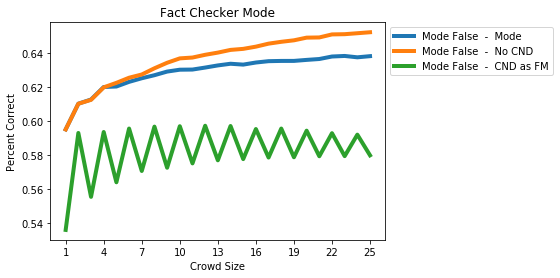

In [42]:
quick_graph(crowd_size_binary,'fcmodefalse_origmode', title = "Fact Checker Mode")
quick_graph(crowd_size_binary,'fcmodefalse_nocnd')
quick_graph(crowd_size_binary,'fcmodefalse_modefm')

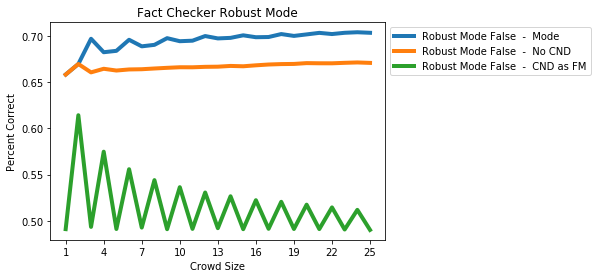

In [43]:
quick_graph(crowd_size_binary,'rmfalse_origmode', title = "Fact Checker Robust Mode")
quick_graph(crowd_size_binary,'rmfalse_nocnd')
quick_graph(crowd_size_binary,'rmfalse_modefm')

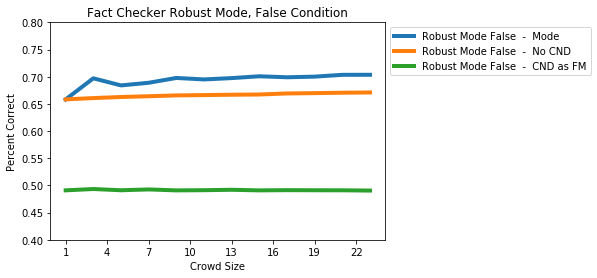

In [44]:
quick_graph(crowd_size_binary,'rmfalse_origmode', title = "Fact Checker Robust Mode, False Condition", evens = True)
quick_graph(crowd_size_binary,'rmfalse_nocnd', evens = True)
quick_graph(crowd_size_binary,'rmfalse_modefm', evens = True, standard_y = [.40,.80])

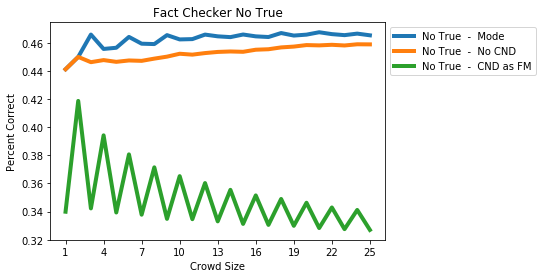

In [45]:
quick_graph(crowd_size_binary,'notrue_origmode', title = "Fact Checker No True")
quick_graph(crowd_size_binary,'notrue_nocnd')
quick_graph(crowd_size_binary,'notrue_modefm')

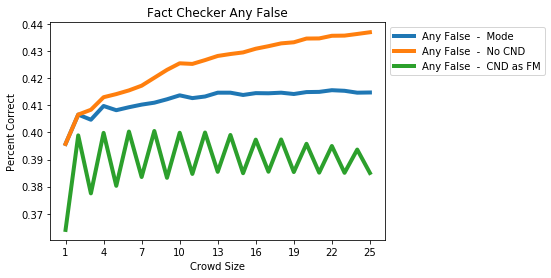

In [46]:
quick_graph(crowd_size_binary,'anyfalse_origmode', title = "Fact Checker Any False")
quick_graph(crowd_size_binary,'anyfalse_nocnd')
quick_graph(crowd_size_binary,'anyfalse_modefm')

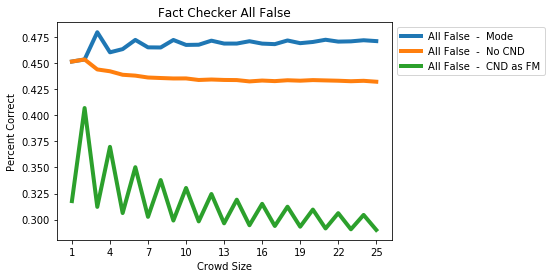

In [47]:
quick_graph(crowd_size_binary,'allfalse_origmode', title = "Fact Checker All False")
quick_graph(crowd_size_binary,'allfalse_nocnd')
quick_graph(crowd_size_binary,'allfalse_modefm')

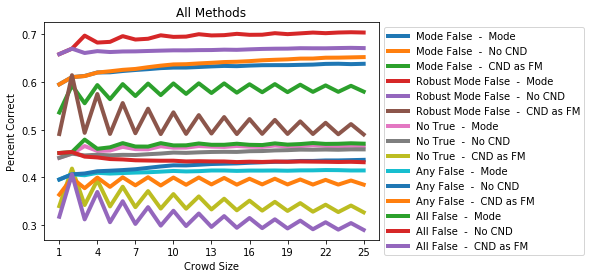

In [48]:
quick_graph(crowd_size_binary,'fcmodefalse_origmode', title = "All Methods")
quick_graph(crowd_size_binary,'fcmodefalse_nocnd')
quick_graph(crowd_size_binary,'fcmodefalse_modefm')
quick_graph(crowd_size_binary,'rmfalse_origmode')
quick_graph(crowd_size_binary,'rmfalse_nocnd')
quick_graph(crowd_size_binary,'rmfalse_modefm')
quick_graph(crowd_size_binary,'notrue_origmode')
quick_graph(crowd_size_binary,'notrue_nocnd')
quick_graph(crowd_size_binary,'notrue_modefm')
quick_graph(crowd_size_binary,'anyfalse_origmode')
quick_graph(crowd_size_binary,'anyfalse_nocnd')
quick_graph(crowd_size_binary,'anyfalse_modefm')
quick_graph(crowd_size_binary,'allfalse_origmode')
quick_graph(crowd_size_binary,'allfalse_nocnd')
quick_graph(crowd_size_binary,'allfalse_modefm')

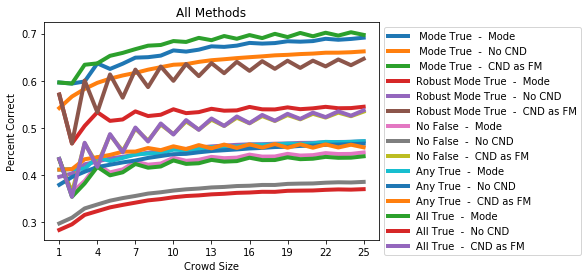

In [49]:
quick_graph(crowd_size_binary,'fcmodetrue_origmode', title = "All Methods")
quick_graph(crowd_size_binary,'fcmodetrue_nocnd')
quick_graph(crowd_size_binary,'fcmodetrue_modefm')
quick_graph(crowd_size_binary,'rmtrue_origmode')
quick_graph(crowd_size_binary,'rmtrue_nocnd')
quick_graph(crowd_size_binary,'rmtrue_modefm')
quick_graph(crowd_size_binary,'nofalse_origmode')
quick_graph(crowd_size_binary,'nofalse_nocnd')
quick_graph(crowd_size_binary,'nofalse_modefm')
quick_graph(crowd_size_binary,'anytrue_origmode')
quick_graph(crowd_size_binary,'anytrue_nocnd')
quick_graph(crowd_size_binary,'anytrue_modefm')
quick_graph(crowd_size_binary,'alltrue_origmode')
quick_graph(crowd_size_binary,'alltrue_nocnd')
quick_graph(crowd_size_binary,'alltrue_modefm')

#### Old, ignore
## Explaining Terminology

## crowd_size_all dictionary

All key for crowd_size_all have the fact checker designation, followed by "_" followed by the type of mode from the crowd.

For fact checker designations, there is robust mode and mode, which are self explanatory. Articles are either T, FM, or CND.

But for all the article "sets", the designation is binary. For example, the set allfalse, is those articles that are true according to all three of our possible designations (mode, robust mode, and no one said true). Crowds are correct when they labels articles in allfalse as false, or when they label articles not in that set as anything other than false.

Fact Checker designations:

fcmode = mode of fact checkers 

rm = robust mode of fact checkers 

allfalse = In all three false designations

anyfalse = In any of the three false designations

notrue = no one labelled it true

The above three have a "true" set counterpart.

Crowd Signal:

origmode = original mode

nocnd = ignore CND, pure majority of "f" or "t" wins

modefm = CND is treated as FM, and then pure majority.


So, for example, anyfalse_modefm is when the articles are binary in or not in the anyfalse set, and crowd signal is only "f" or "t", with all cnd votes by individual respondents treated as "f"

run this as:

`quick_graph(crowd_size_all,'allfalse_modefm')`

## dual_dictionary dictionary

This dictionary combines the "set" categories.

Here, "any","all",and "no" are combined. So article are labelled by fact checkers as true if they are in the true set, false if they are in the false set, and CND otherwise. For example, "all" means that false articles were designated false by all fact checker designations (mode, rm, and nofalse), true articles were labelled true by all fact checker designation (mode, rm, and nofalse), and otherwise cnd.

The same three categories still exists from the crowd signal.

So fact checker designations:

1. all
2. any
3. no

And the same fact checker categories:

1. origmode
2. nocnd
3. modefm


So "all_nomode" is where true and false have to meet the strictest designations from fact checkers, and crowd signal is the original mode. "any_nocnd" is where true and false are meet any fact checker designation, and the respondent crowd ignores cnd. 

Use it like so:


`quick_graph(dual_dictionary,'any_nocnd')`

(just change the dictionary in the first arguement)


The graphs currently available in the first cut are below:

In [50]:
#this has all data on mode related
crowd_size_all = pickle.load( open( local_pickels + 'crowd_size_all.p', "rb" ) )
crowd_size_all = pickle.load( open( local_pickels + 'crowd_size_all_alt.p', "rb" ) )
dual_dictionary = pickle.load( open( local_pickels + 'dual_dictionary.p', "rb" ) )


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/GoogleDrive/.shortcut-targets-by-id/1h0IAi0shnuJVKYqNE5pxldO9HqGsF0uv/crowd_source_code/local_pickles/crowd_size_all.p'

In [51]:
dic1_keys = list(crowd_size_all.keys())
dic2_keys = list(dual_dictionary.keys())
if len(dic1_keys) < len(dic2_keys):
    while len(dic1_keys) < len(dic2_keys): 
        dic1_keys.append(" ")
else:
    while len(dic1_keys) > len(dic2_keys):
        dic2_keys.append(" ")
keydf = pd.DataFrame({"crowd_size_all": dic1_keys,"dual_dictionary":dic2_keys})
keydf

NameError: name 'crowd_size_all' is not defined

In [52]:
quick_graph(crowd_size_all,'fcmode_origmode')
quick_graph(crowd_size_all,'fcmode_nocnd')
quick_graph(crowd_size_all,'fcmode_modefm')
quick_graph(crowd_size_all,'rm_origmode')
quick_graph(crowd_size_all,'rm_nocnd')
quick_graph(crowd_size_all,'rm_modefm')
quick_graph(crowd_size_all,'allfalse_origmode')
quick_graph(crowd_size_all,'allfalse_nocnd')
quick_graph(crowd_size_all,'allfalse_modefm')
quick_graph(crowd_size_all,'anyfalse_origmode')
quick_graph(crowd_size_all,'anyfalse_nocnd')
quick_graph(crowd_size_all,'anyfalse_modefm')
quick_graph(crowd_size_all,'notrue_origmode')
quick_graph(crowd_size_all,'notrue_nocnd')
quick_graph(crowd_size_all,'notrue_modefm')
quick_graph(crowd_size_all,'alltrue_origmode')
quick_graph(crowd_size_all,'alltrue_nocnd')
quick_graph(crowd_size_all,'alltrue_modefm')
quick_graph(crowd_size_all,'anytrue_origmode')
quick_graph(crowd_size_all,'anytrue_nocnd')
quick_graph(crowd_size_all,'anytrue_modefm')
quick_graph(crowd_size_all,'nofalse_origmode')
quick_graph(crowd_size_all,'nofalse_nocnd')
quick_graph(crowd_size_all,'nofalse_modefm')


NameError: name 'crowd_size_all' is not defined

In [53]:
quick_graph(dual_dictionary,'all_origmode')
quick_graph(dual_dictionary,'any_origmode')
quick_graph(dual_dictionary,'no_origmode')


NameError: name 'dual_dictionary' is not defined

In [54]:
quick_graph(crowd_size_all,'allfalse_nocnd')
#quick_graph(crowd_size_all,'fcmode_nocnd')

NameError: name 'crowd_size_all' is not defined

In [55]:
quick_graph(crowd_size_all,'rm_origmode')
quick_graph(crowd_size_all,'rm_nocnd')

NameError: name 'crowd_size_all' is not defined

In [56]:
quick_graph(crowd_size_all,'notrue_origmode')
quick_graph(crowd_size_all,'notrue_nocnd')

NameError: name 'crowd_size_all' is not defined

quick_graph(crowd_size_all,'allfalse_origmode')
quick_graph(crowd_size_all,'allfalse_nocnd')

In [57]:
quick_graph(crowd_size_all,'allfalse_origmode')
quick_graph(crowd_size_all,'allfalse_nocnd')

NameError: name 'crowd_size_all' is not defined

In [58]:
quick_graph(crowd_size_all,'anyfalse_origmode')
quick_graph(crowd_size_all,'anyfalse_nocnd')

NameError: name 'crowd_size_all' is not defined

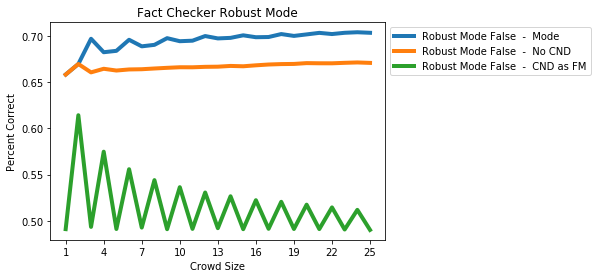

In [59]:
quick_graph(crowd_size_binary,'rmfalse_origmode', title = "Fact Checker Robust Mode")
quick_graph(crowd_size_binary,'rmfalse_nocnd')
quick_graph(crowd_size_binary,'rmfalse_modefm')




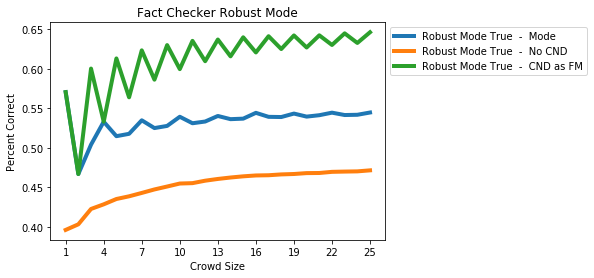

In [60]:
quick_graph(crowd_size_binary,'rmtrue_origmode', title = "Fact Checker Robust Mode")
quick_graph(crowd_size_binary,'rmtrue_nocnd')
quick_graph(crowd_size_binary,'rmtrue_modefm')


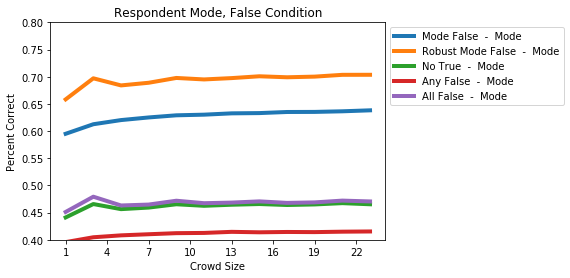

In [61]:
quick_graph(crowd_size_binary,'fcmodefalse_origmode', evens = True, title = "Respondent Mode, False Condition")
quick_graph(crowd_size_binary,'rmfalse_origmode', evens = True)
quick_graph(crowd_size_binary,'notrue_origmode', evens = True)
quick_graph(crowd_size_binary,'anyfalse_origmode', evens = True)
quick_graph(crowd_size_binary,'allfalse_origmode', evens = True, standard_y = [.40,.80])



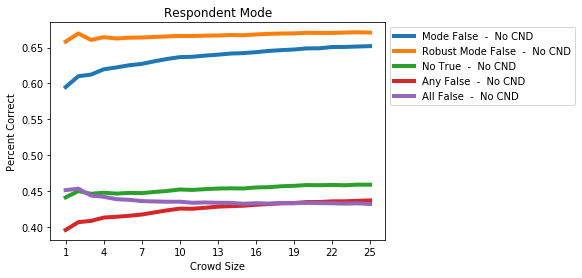

In [62]:
quick_graph(crowd_size_binary,'fcmodefalse_nocnd', title = "Respondent Mode")
quick_graph(crowd_size_binary,'rmfalse_nocnd')
quick_graph(crowd_size_binary,'notrue_nocnd')
quick_graph(crowd_size_binary,'anyfalse_nocnd')
quick_graph(crowd_size_binary,'allfalse_nocnd')

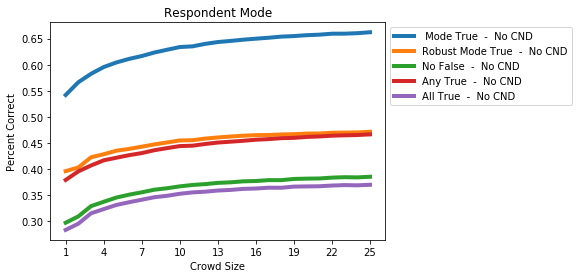

In [63]:
quick_graph(crowd_size_binary,'fcmodetrue_nocnd', title = "Respondent Mode")
quick_graph(crowd_size_binary,'rmtrue_nocnd')
quick_graph(crowd_size_binary,'nofalse_nocnd')
quick_graph(crowd_size_binary,'anytrue_nocnd')
quick_graph(crowd_size_binary,'alltrue_nocnd')

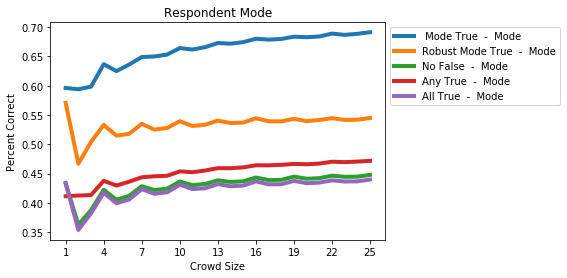

In [64]:
quick_graph(crowd_size_binary,'fcmodetrue_origmode', title = "Respondent Mode")
quick_graph(crowd_size_binary,'rmtrue_origmode')
quick_graph(crowd_size_binary,'nofalse_origmode')
quick_graph(crowd_size_binary,'anytrue_origmode')
quick_graph(crowd_size_binary,'alltrue_origmode')

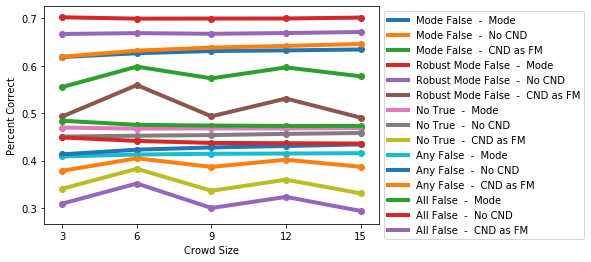

In [65]:
quick_graph(partisan_crowd_size_binary,'fcmodefalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'fcmodefalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'fcmodefalse_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'rmfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'rmfalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'rmfalse_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'notrue_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'notrue_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'notrue_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'anyfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'anyfalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'anyfalse_modefm', partisan = True)
quick_graph(partisan_crowd_size_binary,'allfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'allfalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'allfalse_modefm', partisan = True)

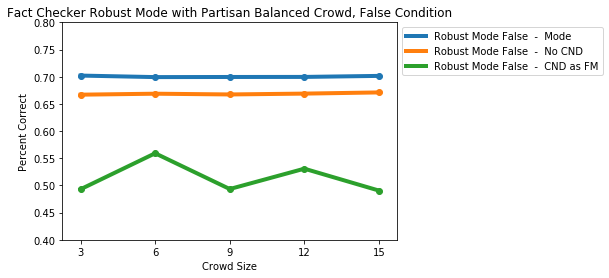

In [66]:
quick_graph(partisan_crowd_size_binary,'rmfalse_origmode', partisan = True, title = "Fact Checker Robust Mode with Partisan Balanced Crowd, False Condition")
quick_graph(partisan_crowd_size_binary,'rmfalse_nocnd', partisan = True)
quick_graph(partisan_crowd_size_binary,'rmfalse_modefm', partisan = True, standard_y = [.40,.80])

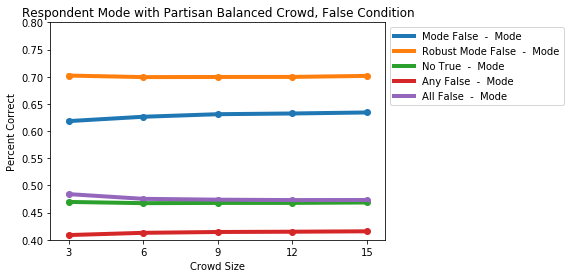

In [37]:
quick_graph(partisan_crowd_size_binary,'fcmodefalse_origmode', partisan = True, title = "Respondent Mode with Partisan Balanced Crowd, False Condition")
quick_graph(partisan_crowd_size_binary,'rmfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'notrue_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'anyfalse_origmode', partisan = True)
quick_graph(partisan_crowd_size_binary,'allfalse_origmode', partisan = True, standard_y = [.40,.80])

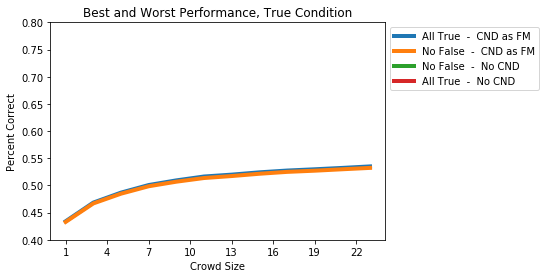

In [38]:
quick_graph(crowd_size_binary,'alltrue_modefm', evens = True, title = "Best and Worst Performance, True Condition")
quick_graph(crowd_size_binary,'nofalse_modefm', evens = True)
quick_graph(crowd_size_binary,'nofalse_nocnd', evens = True)
quick_graph(crowd_size_binary,'alltrue_nocnd', evens = True, standard_y = [.40,.80])

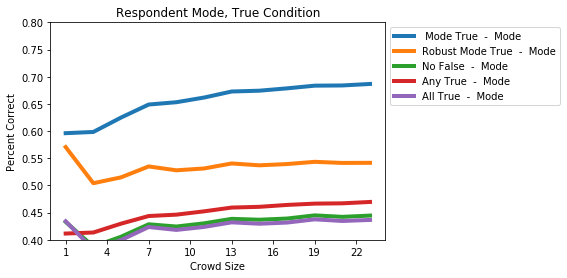

In [39]:
quick_graph(crowd_size_binary,'fcmodetrue_origmode', evens = True, title = "Respondent Mode, True Condition")
quick_graph(crowd_size_binary,'rmtrue_origmode', evens = True)
quick_graph(crowd_size_binary,'nofalse_origmode', evens = True)
quick_graph(crowd_size_binary,'anytrue_origmode', evens = True)
quick_graph(crowd_size_binary,'alltrue_origmode', evens = True, standard_y = [.40,.80])

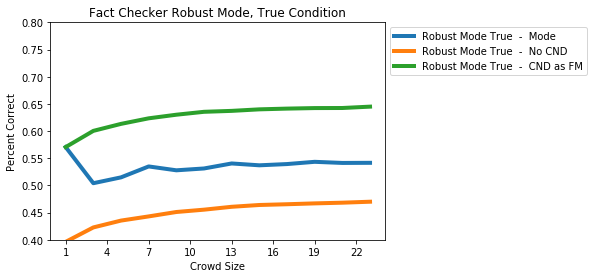

In [40]:
quick_graph(crowd_size_binary,'rmtrue_origmode', title = "Fact Checker Robust Mode, True Condition", evens = True)
quick_graph(crowd_size_binary,'rmtrue_nocnd', evens = True)
quick_graph(crowd_size_binary,'rmtrue_modefm', evens = True, standard_y = [.40,.80])

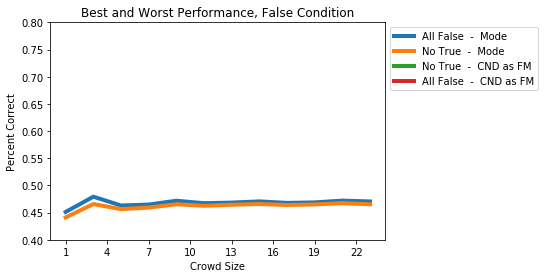

In [41]:
quick_graph(crowd_size_binary,'allfalse_origmode', evens = True, title = "Best and Worst Performance, False Condition")
quick_graph(crowd_size_binary,'notrue_origmode', evens = True)
quick_graph(crowd_size_binary,'notrue_modefm', evens = True)
quick_graph(crowd_size_binary,'allfalse_modefm', evens = True, standard_y = [.40,.80])

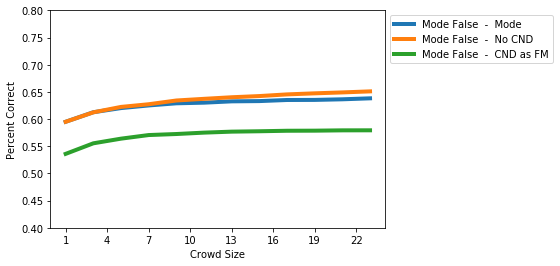

In [42]:
quick_graph(crowd_size_binary,'fcmodefalse_origmode', evens = True, standard_y = [.40,.80])
quick_graph(crowd_size_binary,'fcmodefalse_nocnd', evens = True)
quick_graph(crowd_size_binary,'fcmodefalse_modefm', evens = True)

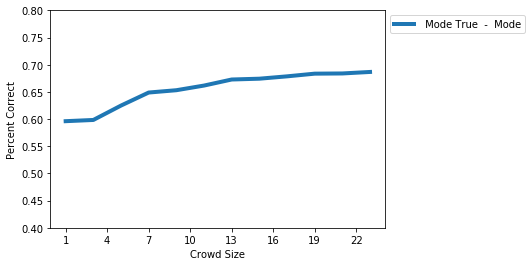

In [43]:
quick_graph(crowd_size_binary,'fcmodetrue_origmode', evens = True, standard_y = [.40,.80])

In [2]:
see_data(crowd_size_binary,"fcmodefalse_origmode")
see_data(crowd_crt,"fcmodefalse_origmode")

NameError: name 'see_data' is not defined

In [3]:
see_data(crowd_size_binary,"fcmodetrue_origmode")

NameError: name 'see_data' is not defined

In [4]:
see_data(crowd_size_binary,"fcmodefalse_nocnd")

NameError: name 'see_data' is not defined

In [5]:
see_data(crowd_size_binary,"fcmodefalse_modefm")

NameError: name 'see_data' is not defined

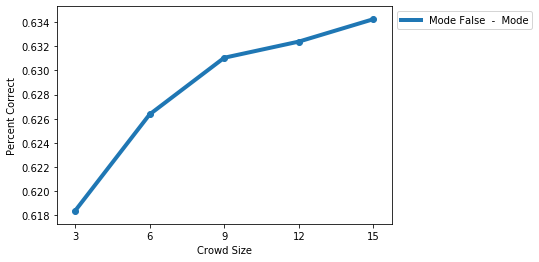

In [14]:
quick_graph(partisan_crowd_size_binary,'fcmodefalse_origmode', partisan = True)


,true_pos,true_neg,false_pos,false_neg,percentage,total
0,8188,31977,9561,17774,0.595037,67500
1,8769,32415,9123,17193,0.610133,67500
2,6519,34831,6707,19443,0.612593,67500
3,8550,33295,8243,17412,0.619926,67500
4,8414,33452,8086,17548,0.620237,67500
5,7582,34468,7070,18380,0.622963,67500
6,8423,33770,7768,17539,0.625081,67500
7,8487,33827,7711,17475,0.626874,67500
8,7954,34504,7034,18008,0.629007,67500
9,8508,34024,7514,17454,0.630104,67500


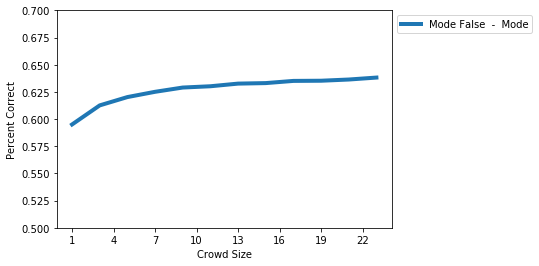

In [77]:
quick_graph(crowd_size_binary,'fcmodefalse_origmode', evens = True, standard_y = [.50,.70])
see_data(crowd_size_binary,'fcmodefalse_origmode')

,true_pos,true_neg,false_pos,false_neg,percentage,total
0,6157,33133,5943,18306,0.618360,63539
1,7203,32595,6481,17260,0.626355,63539
2,7543,32553,6523,16920,0.631045,63539
3,7710,32471,6605,16753,0.632383,63539
4,7825,32474,6602,16638,0.634240,63539


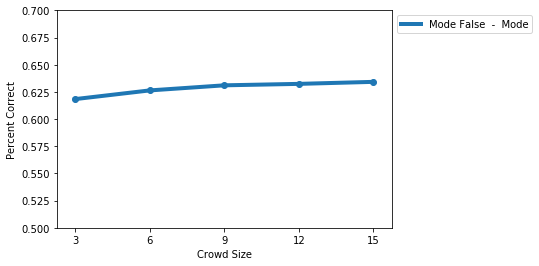

In [76]:
quick_graph(partisan_crowd_size_binary,'fcmodefalse_origmode', partisan = True, standard_y = [.50,.70])
see_data(partisan_crowd_size_binary,'fcmodefalse_origmode')


,true_pos,true_neg,false_pos,false_neg,percentage,total
0,17102,19079,22459,8860,0.536015,67500
1,11973,28051,13487,13989,0.592948,67500
2,18815,18676,22862,7147,0.555422,67500
3,15485,24578,16960,10477,0.593526,67500
4,19700,18369,23169,6262,0.563985,67500
5,17293,22907,18631,8669,0.595556,67500
6,20334,18183,23355,5628,0.570622,67500
7,18496,21780,19758,7466,0.596681,67500
8,20735,17910,23628,5227,0.572519,67500
9,19225,21067,20471,6737,0.596919,67500


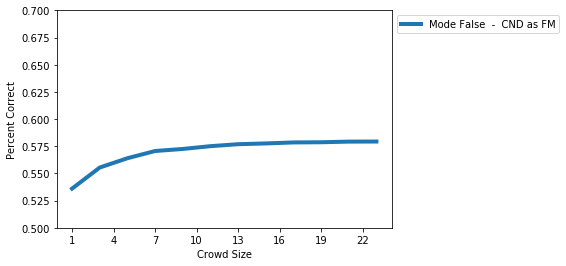

In [75]:
quick_graph(crowd_size_binary,'fcmodefalse_modefm', evens = True, standard_y = [.50,.70])
see_data(crowd_size_binary,'fcmodefalse_modefm')

,true_pos,true_neg,false_pos,false_neg,percentage,total
0,8188,31977,9561,17774,0.595037,67500
1,8769,32415,9123,17193,0.610133,67500
2,9715,31622,9916,16247,0.612400,67500
3,10143,31690,9848,15819,0.619748,67500
4,10552,31459,10079,15410,0.622385,67500
5,10779,31435,10103,15183,0.625393,67500
6,10977,31365,10173,14985,0.627289,67500
7,11223,31365,10173,14739,0.630933,67500
8,11436,31371,10167,14526,0.634178,67500
9,11653,31328,10210,14309,0.636756,67500


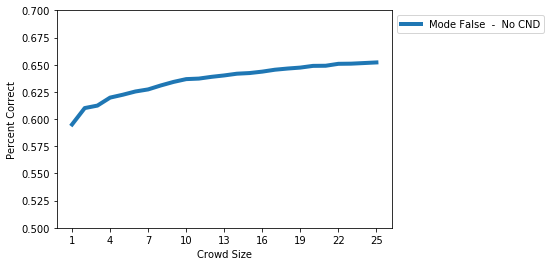

In [73]:
quick_graph(crowd_size_binary,'fcmodefalse_nocnd', standard_y = [.50,.70])
see_data(crowd_size_binary,'fcmodefalse_nocnd')

In [ ]:
quick